In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
# reading data
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.shape

(29020, 20)

In [7]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
# dropping unimportant columns
df.drop(columns = ["Unnamed: 0", "Booking_ID"], inplace = True)

In [9]:
df.shape

(29020, 18)

In [10]:
# checking null values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
# checking for duplicates

df.duplicated().sum()

7661

In [12]:
# for now lets drop these duplicates

df.drop_duplicates(inplace = True)

In [13]:
df.shape

(21359, 18)

In [14]:
## examine columns
for i in df.columns:
    print(df[i].value_counts())

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64
no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64
no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64
type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64
required_car_parking_space
0    20452
1      907
Name: count, dtype: int64
room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64
lead_time
0      951
1      715
2  

Our data is imbalanced dataset

In [15]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [16]:
# lets sepearate the columns based on categorical and numerical type

cat_cols = ['type_of_meal_plan','required_car_parking_space','booking_status','room_type_reserved','market_segment_type','repeated_guest']

num_cols = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

print(len(cat_cols), len(num_cols))

6 12


# DATA ANALYSIS
- Data Visualization

In [17]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


UNIVARIATE ANALYSIS

1. Numerical Columns

In [18]:
def num_plot_dist(df, num_features):
    fig ,axes = plt.subplots(len(num_features),2,figsize=(15, len(num_features)*5))
    if len(num_features) ==1:
        axes = [axes]

    for i , column in enumerate(num_features):
        sns.histplot(data=df, x = column , ax = axes[i][0], kde =True, palette = "Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data = df, x=column, ax = axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

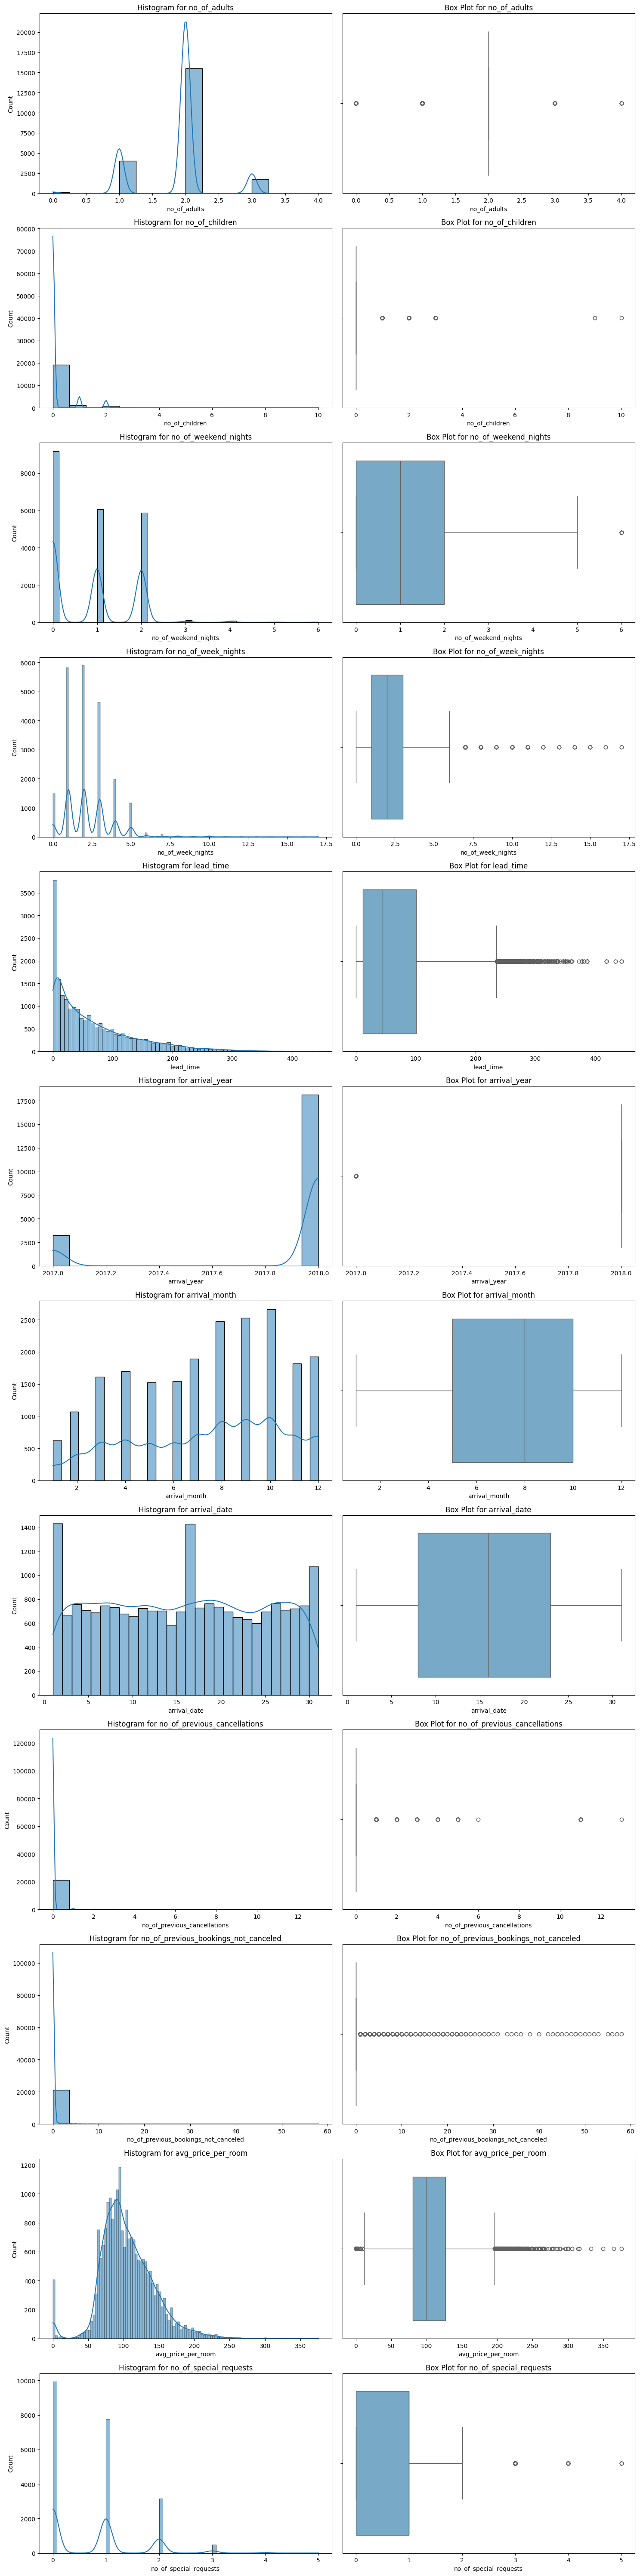

In [19]:
num_plot_dist(data, num_cols)

2. Categorical features

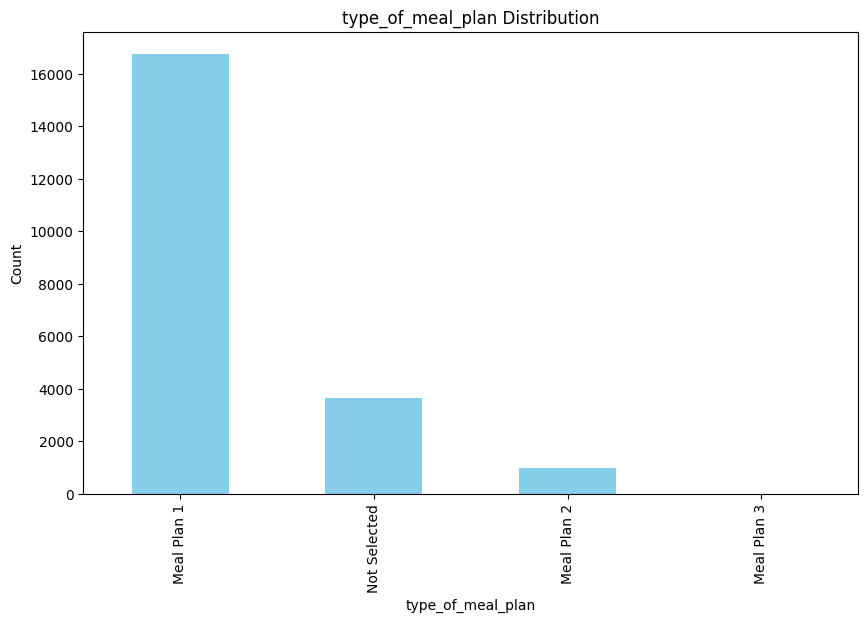

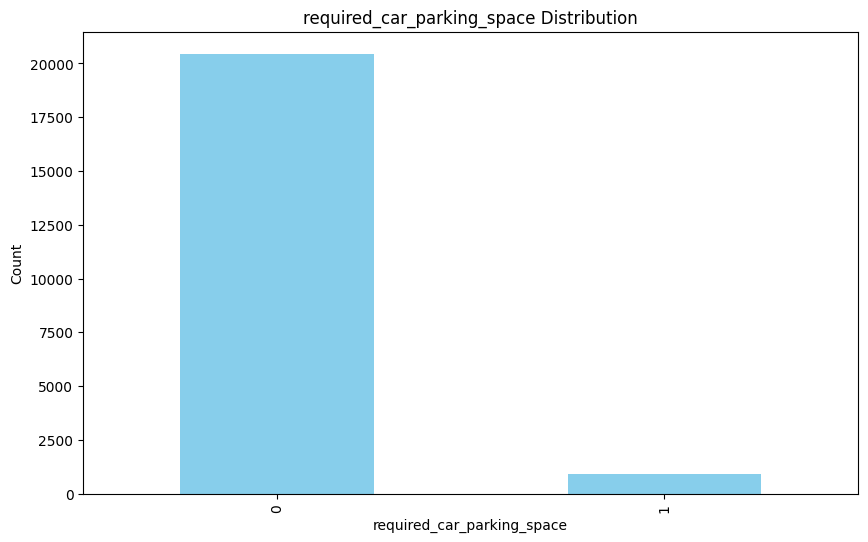

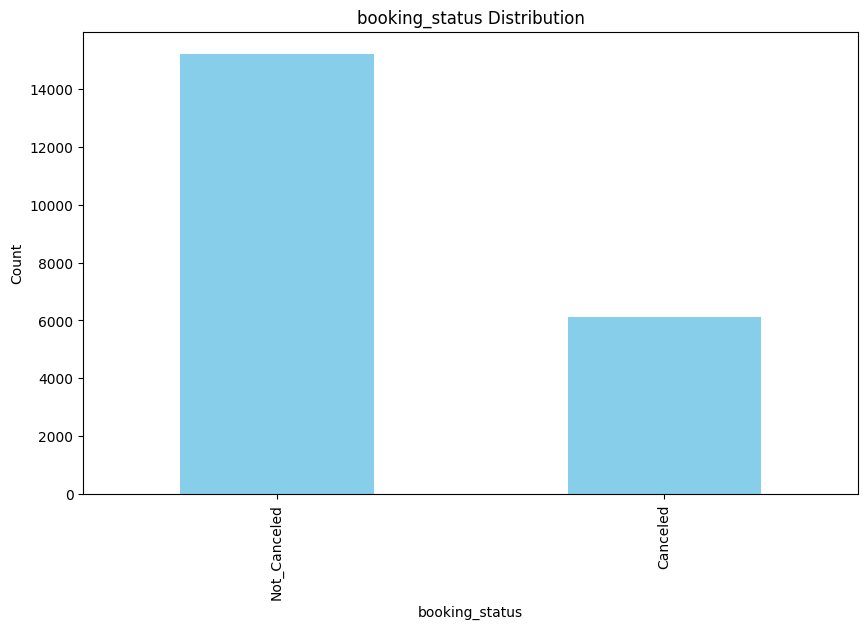

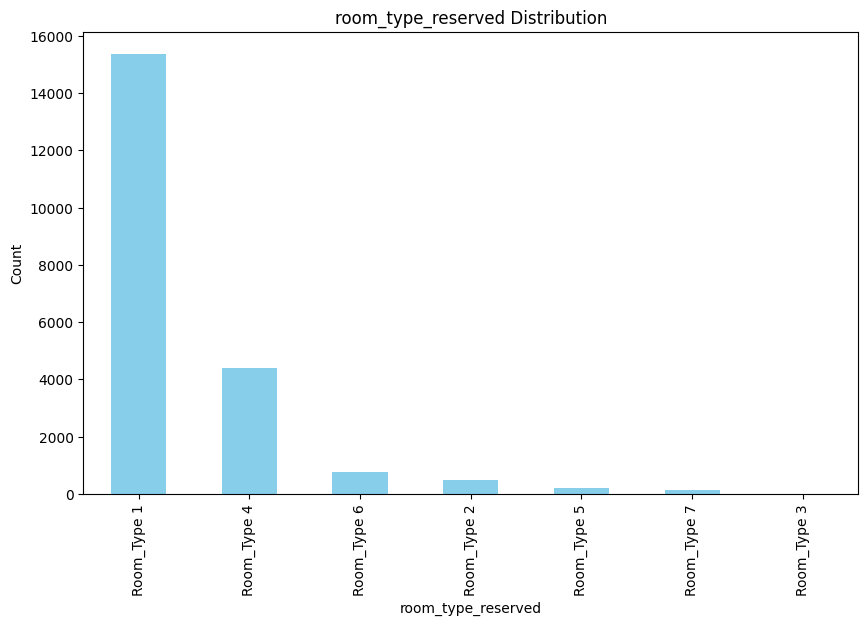

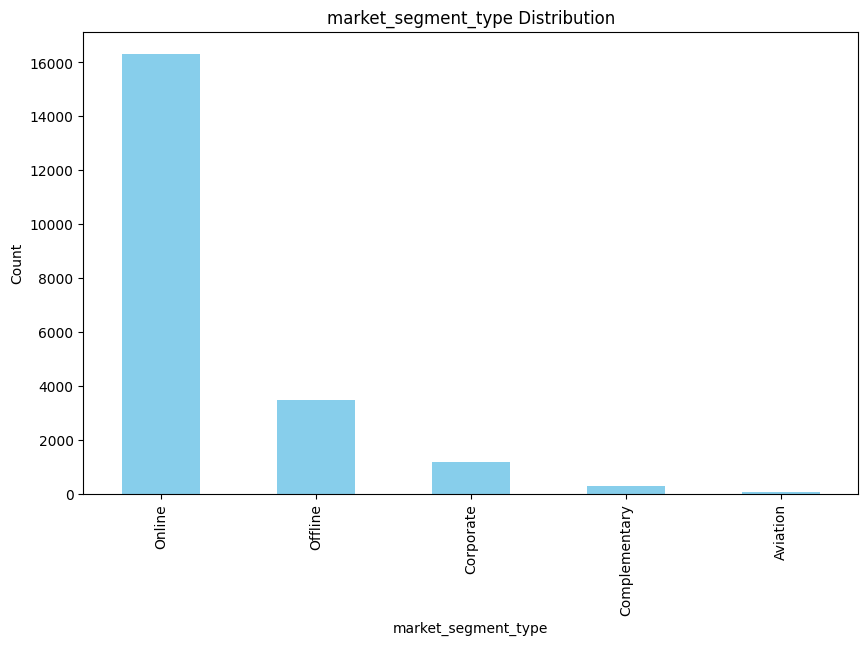

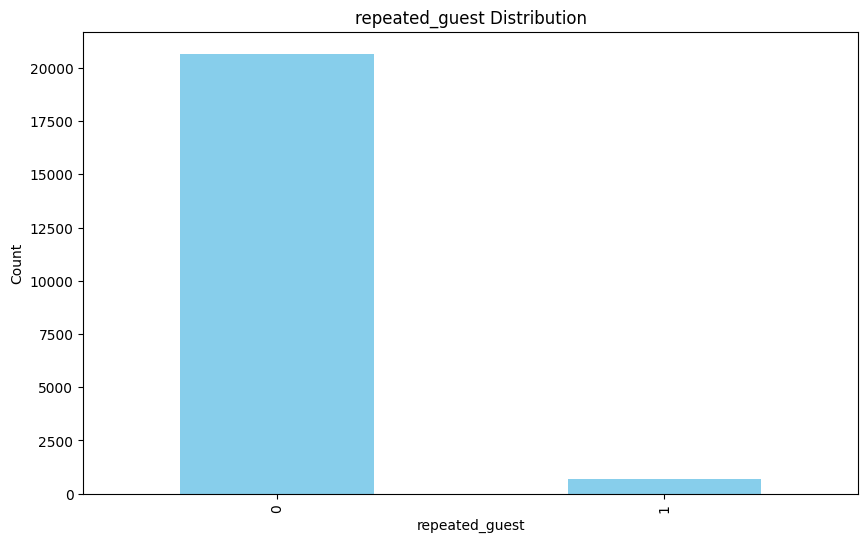

In [20]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind = "bar", color = "skyblue")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

# Bivaraite Analysis for num_columns

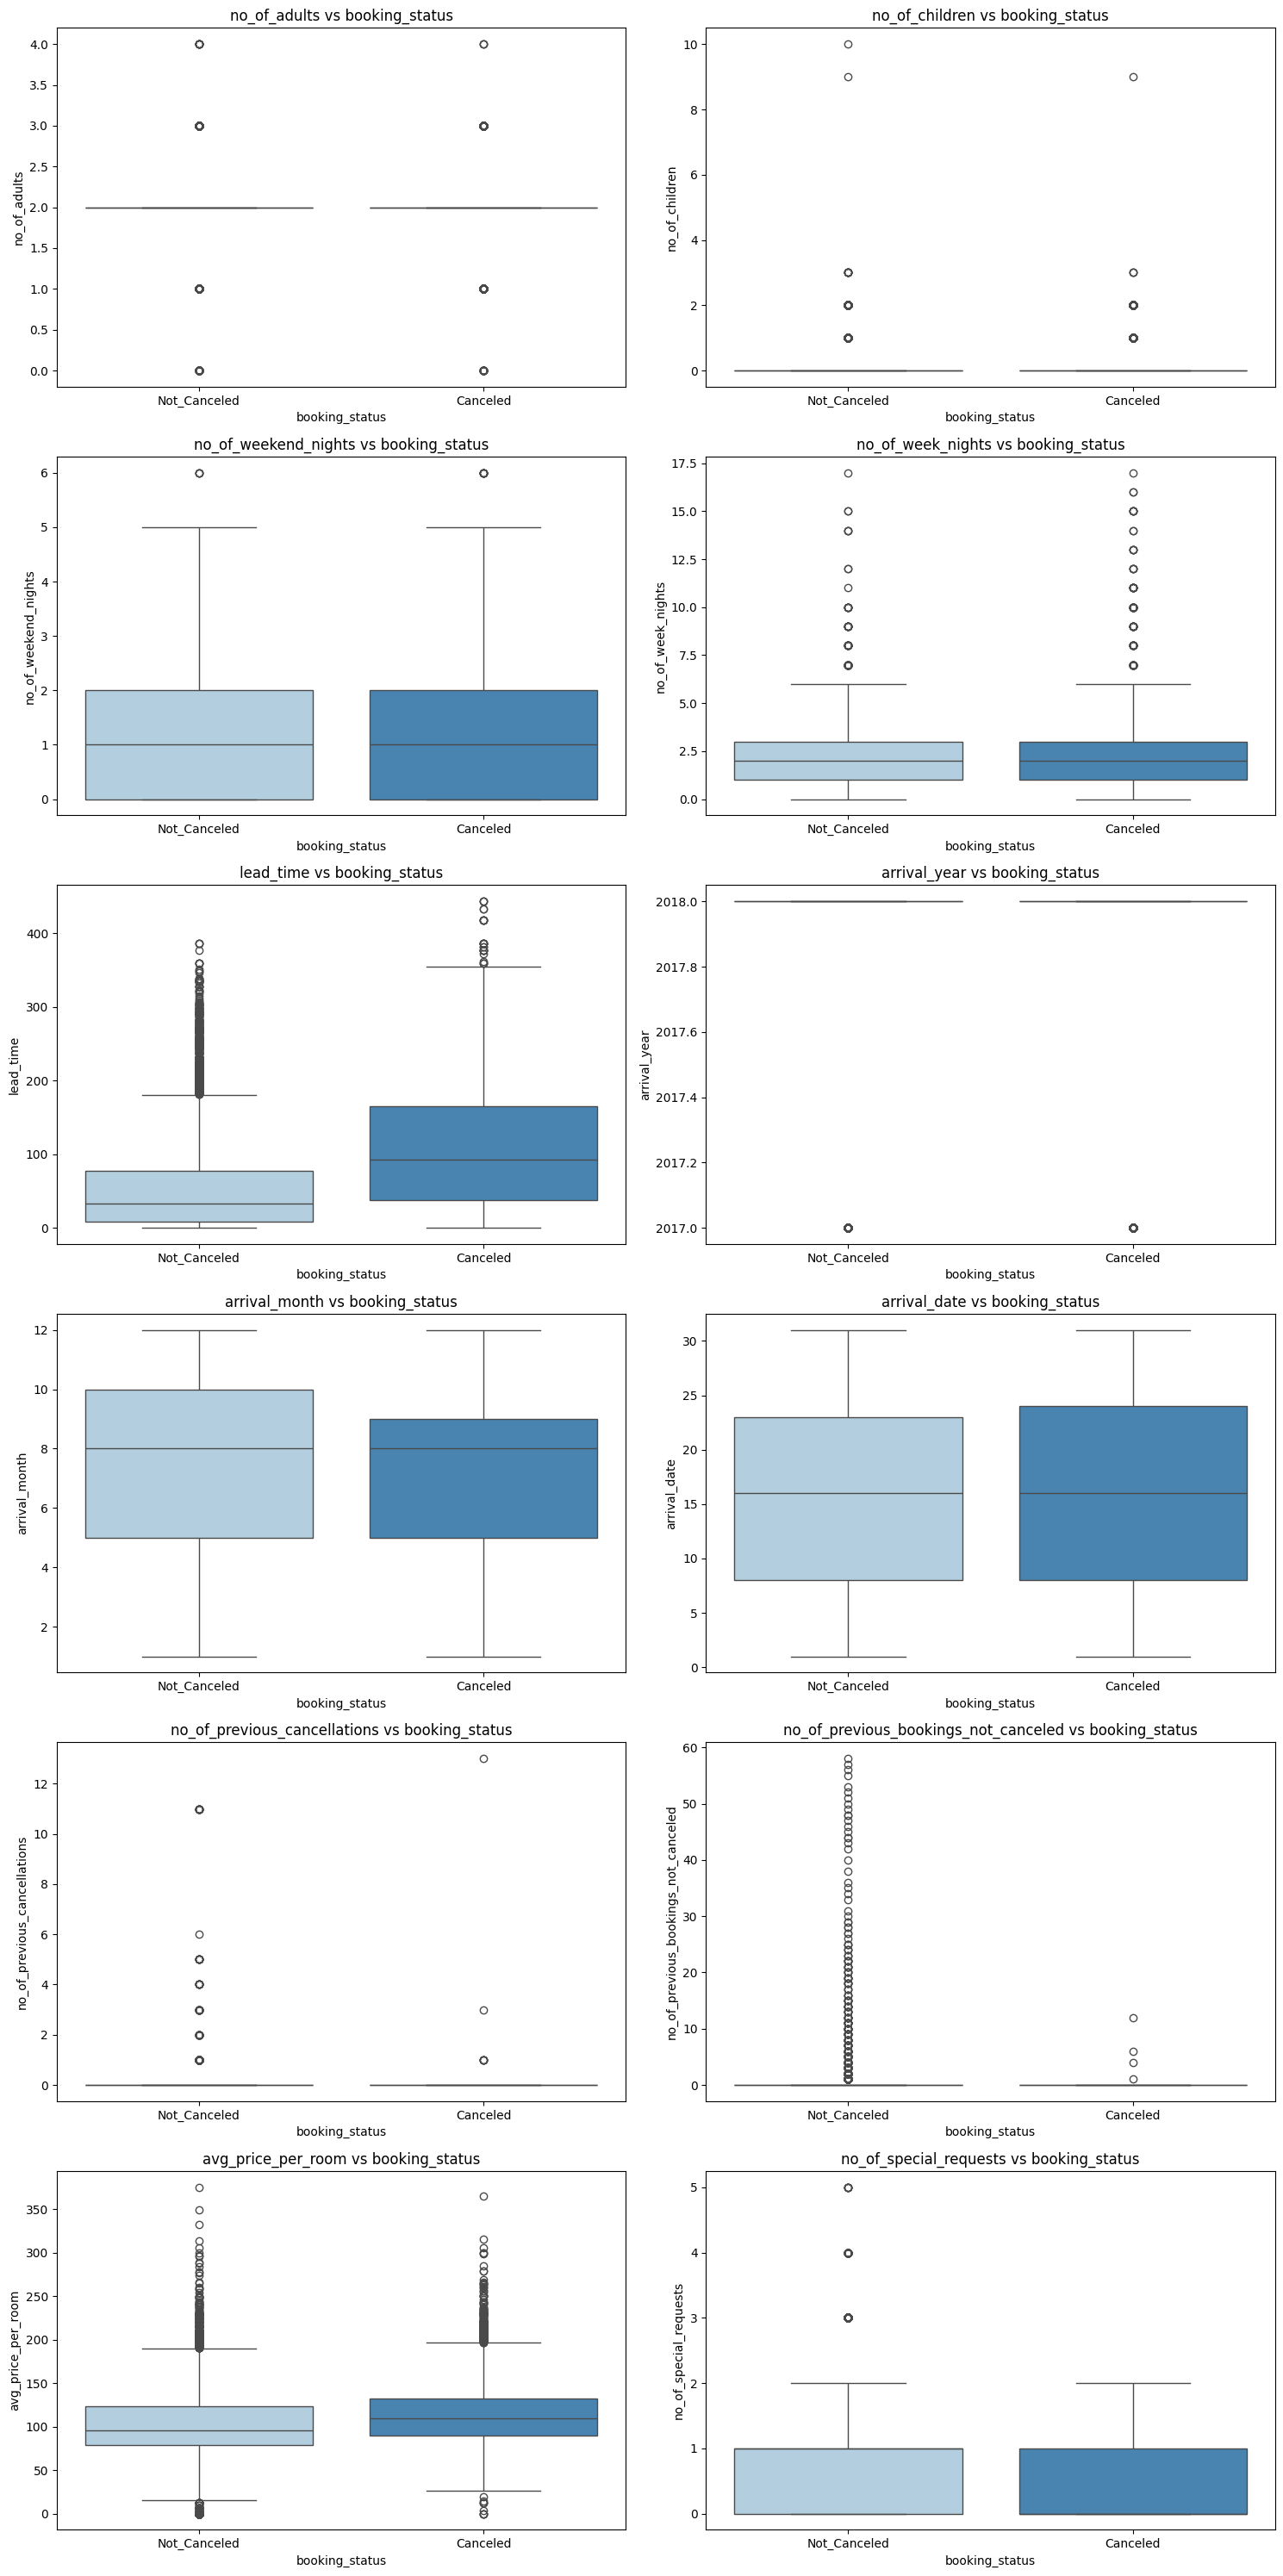

In [21]:
# comparing two columns against each other

def plot_bivariate_num(df, target, num_feature):
    num_plots = len(num_feature)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows,2, figsize = (15, num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_feature):
        sns.boxplot(x=target, y=column, ax = axes[i], data = df, palette = "Blues")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()

plot_bivariate_num(data , 'booking_status', num_cols)

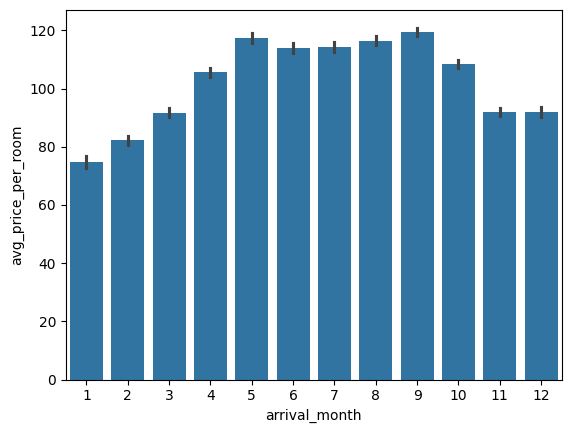

In [22]:
sns.barplot(x='arrival_month', y="avg_price_per_room", data = data)
plt.show()
# as number of customer increases hotel also increases the prices per room

# Bivaraite Analysis for cat_columns

In [23]:
def plot_bivariate_cat(df, target, cat_feature):
    num_features = len(cat_feature)
    num_rows = (num_features+1)//2

    fig, axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))

    axes = axes.flatten()
    for i, feature in enumerate(cat_feature):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis = 'x', rotation = 90)

    plt.tight_layout()
    plt.show()

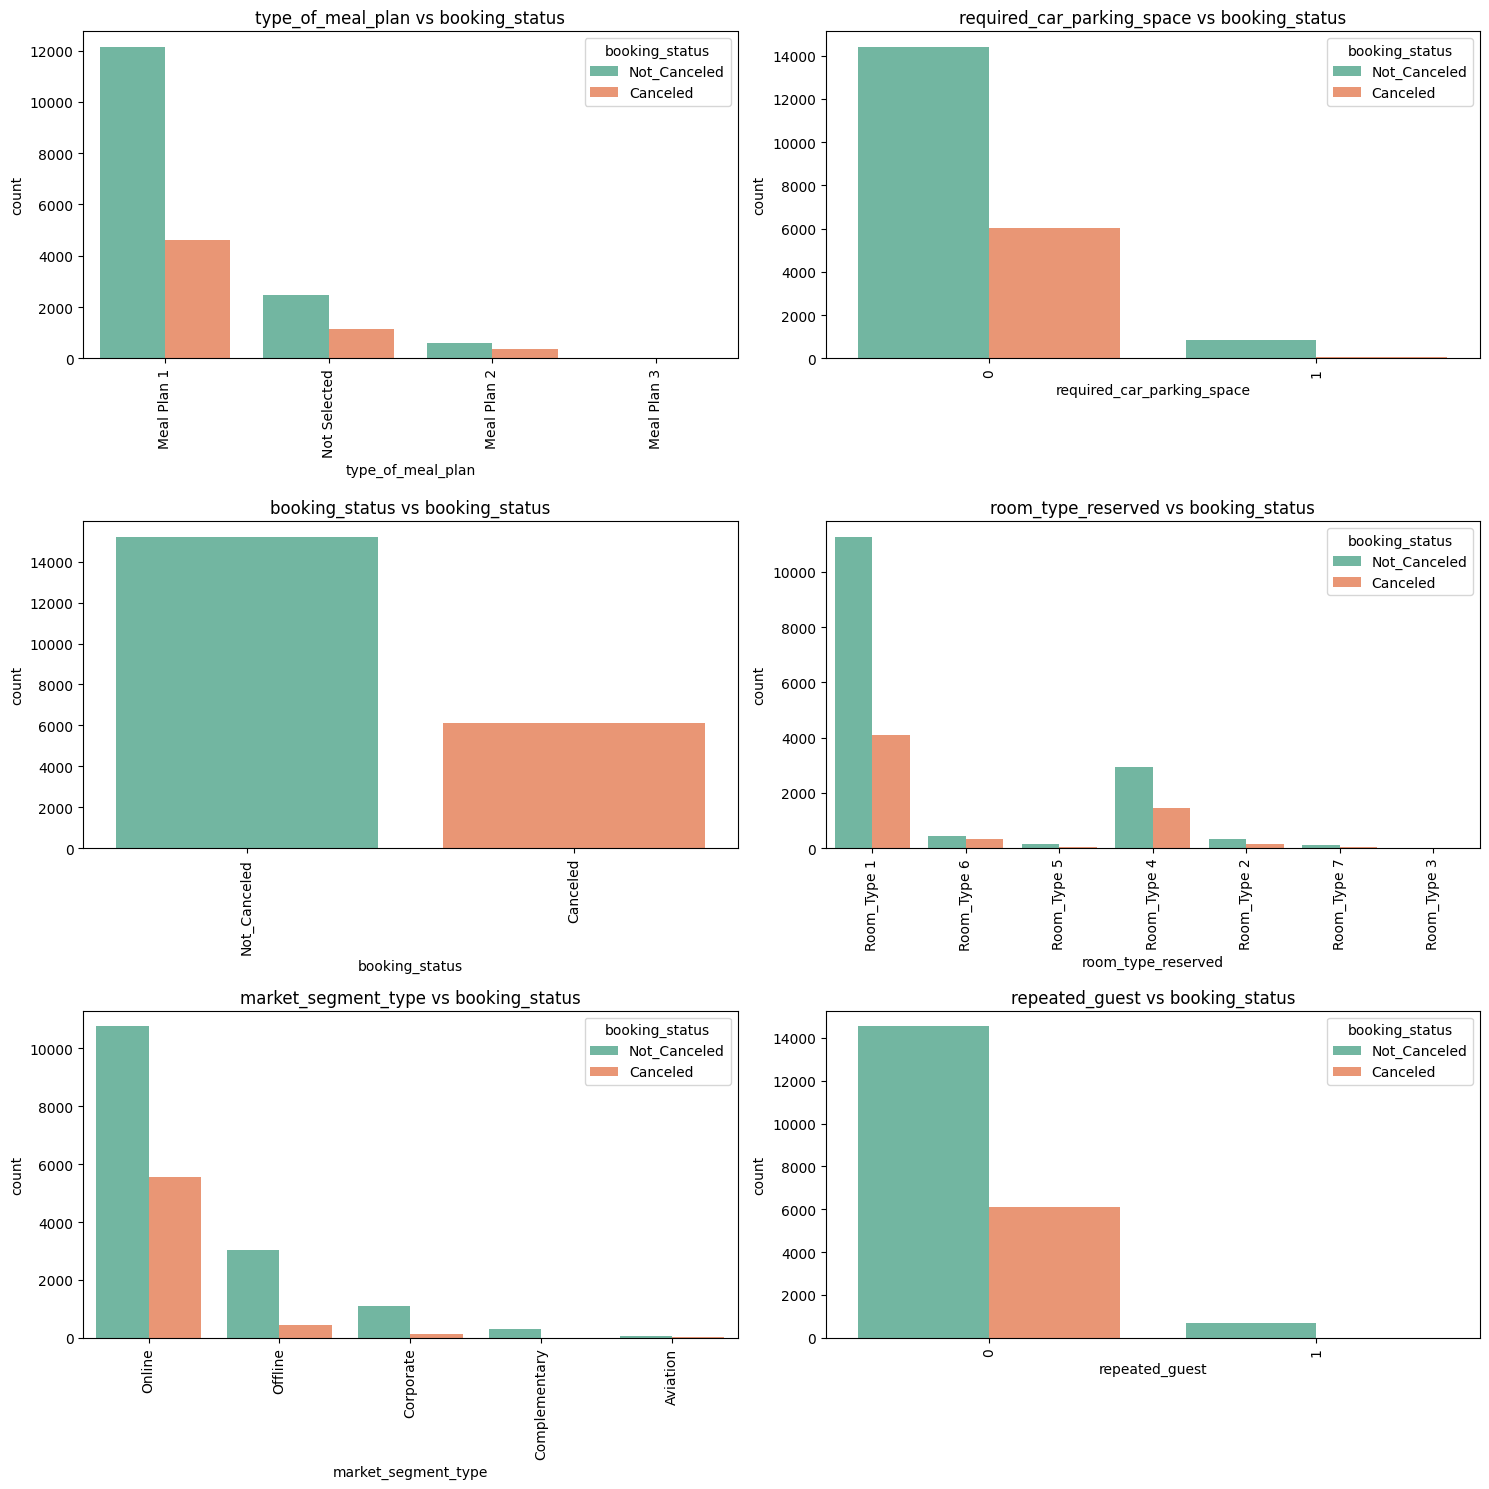

In [24]:
plot_bivariate_cat(data, 'booking_status',cat_cols)

- Data Processing

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [27]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
mappings={}
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label : code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [ ]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1}}

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [31]:
## checking for multicolinearity
!pip install statsmodels

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [33]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [34]:
vif_data # it has all columns names
# our data is not having much colinearity, if VIF values >=5 then we can consider it as multicolinarity

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


<Axes: >

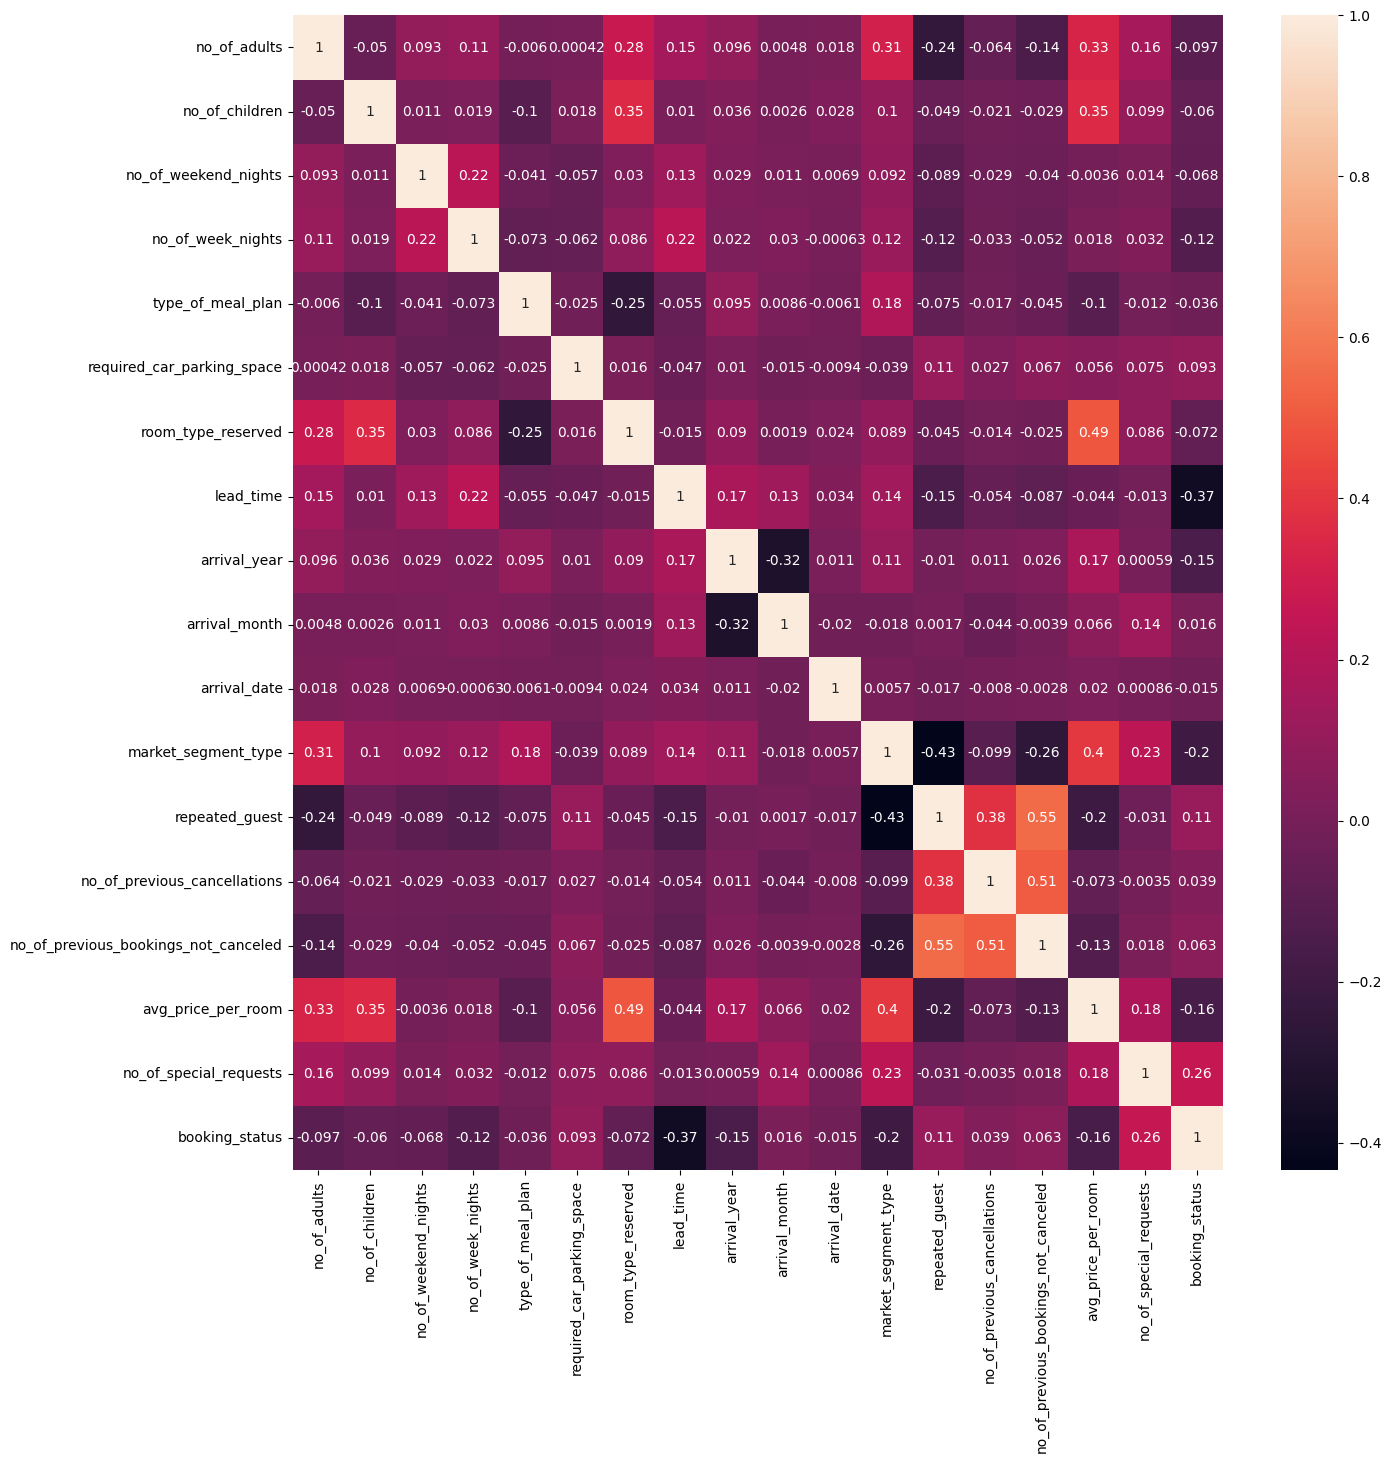

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [36]:
# skewness :- shows the distribution of data
skewness = df.skew()
skewness 

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [37]:
## handling skewness
for col in df.columns:
    if skewness[col]>5:
        df[col] = np.log1p(df[col])

skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [38]:
## Imbalance data
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [39]:
# high imbalancing for booking_status

X=df.drop(columns="booking_status")
y=df["booking_status"]
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [40]:
pip install scikit-learn==1.3.2 scipy==1.11.4


Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install imbalanced-learn==0.11.0

Note: you may need to restart the kernel to use updated packages.


In [42]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state =42)
X_res, y_res = smote.fit_resample(X,y)

In [46]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [ ]:
df.shape # df dataset is not changed it is as it is

(21359, 18)

In [49]:
# creating balaced_dataset
balanced_df = pd.DataFrame(X_res, columns = X.columns)
balanced_df['booking_status'] = y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [51]:
df = balanced_df.copy()

In [52]:
df.shape

(30462, 18)

In [54]:
## Feature Selection
len(df.columns)

18

In [56]:
# model
from sklearn.ensemble import RandomForestClassifier

In [57]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [58]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [61]:
feature_importance = model.feature_importances_

In [62]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance': feature_importance
})

In [65]:
top_features_importance_df = feature_importance_df.sort_values(by = 'importance',ascending=False)

In [66]:
len(df.columns)

18

In [67]:
# instead of using all 18 features we will be using top 10 features
top_10_features = top_features_importance_df["feature"].head(10).values
top_10_df = df[top_10_features.tolist()+["booking_status"]]

In [70]:
top_10_df.shape

(30462, 11)

In [71]:
df = top_10_df

In [72]:
# Model Selection
!pip install xgboost lightgbm

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ---------------------------------------- 0/2 [xgboost]
   ------

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [74]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [75]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# different models
classifiers = {
    "Random Forest":RandomForestClassifier(random_state=42),
    "LogisticRegression":LogisticRegression(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42),
    "Support vector classifier":SVC(random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGboost":XGBClassifier(random_state=42),
    "Adaboost":AdaBoostClassifier(random_state=42),
    "LGBM":LGBMClassifier(random_state=42)
}

In [81]:
# metrics
metrics = {
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "F1 Score":[]
}

In [82]:
# training and evaluating each clssifier

for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)


    y_pred = classifier.predict(X_test)
    accuracy =accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [88]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,LogisticRegression,0.774331,0.802787,0.731922,0.765718
2,Gradient Boosting,0.837190,0.821473,0.864821,0.842590
3,Support vector classifier,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779419,0.856612,0.675244,0.755191
6,Naive Bayes,0.773346,0.803232,0.728664,0.764133
7,XGboost,0.870343,0.866324,0.878176,0.872210
8,Adaboost,0.821927,0.814780,0.836808,0.825647
9,LGBM,0.866732,0.851494,0.890879,0.870742


In [89]:
# select best one and perform hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [90]:
X=df.drop(columns="booking_status")
y=df["booking_status"]

In [91]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [92]:
rf = RandomForestClassifier(random_state=42)

In [98]:
params_dist ={
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring = 'accuracy'
)

In [100]:
# fitting random_search on training data
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=  10.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  30.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  20.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  25.5s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000216C6487500>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000216C6485D30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000216C64857C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000216C6484C20>},
                   random_state=42, scoring='accuracy', verbose=2)

In [101]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [102]:
best_rf_model = random_search.best_estimator_

In [103]:
y_pred = best_rf_model.predict(X_test)

In [104]:
accuracy =accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [105]:
## save this model 
import joblib

In [106]:
# save these model
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [107]:
# load this model
loaded_model = joblib.load("random_forest.pkl")

In [108]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [109]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)
predictions = loaded_model.predict(new_data)

In [111]:
print(predictions)

[1]
